In [19]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# testfile = open('data/congress_test.csv', "r+",encoding='utf-8', errors='ignore')
# text = testfile.read()
# testfile.seek(0)
# testfile.write(text)
# testfile.close()

# trainfile = open('data/congress_train.csv', "r+",encoding='utf-8', errors='ignore')
# text = trainfile.read()
# trainfile.seek(0)
# trainfile.write(text)
# trainfile.close()

# valfile = open('data/congress_val.csv', "r+",encoding='utf-8', errors='ignore')
# text = valfile.read()
# valfile.seek(0)
# valfile.write(text)
# valfile.close()

train_df = pd.read_csv('data/congress_train.csv').dropna()
valid_df = pd.read_csv('data/congress_val.csv').dropna()
test_df = pd.read_csv('data/congress_test.csv').dropna()
train_text = list(train_df['Title'])
train_text = [str(i) for i in train_text]
valid_text = list(valid_df['Title'])
valid_text = [str(i) for i in valid_text]
test_text = list(test_df['Title'])
test_text = [str(i) for i in test_text]
train_y = to_categorical(list(train_df['Major']))
valid_y = to_categorical(list(valid_df['Major']))
test_y = to_categorical(list(test_df['Major']))

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)
train_seq = tokenizer.texts_to_sequences(train_text)
test_seq = tokenizer.texts_to_sequences(test_text)
valid_seq = tokenizer.texts_to_sequences(valid_text)

train_x = pad_sequences(train_seq, maxlen=100)
test_x = pad_sequences(test_seq, maxlen=100)
valid_x = pad_sequences(valid_seq, maxlen=100)

In [21]:
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential

ff = Sequential()
ff.add(Embedding(10000, 20, input_length=100))
ff.add(Flatten())
ff.add(Dense(24, activation='softmax'))
ff.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_ff = ff.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 56s 201us/step - loss: 1.9644 - acc: 0.4584 - val_loss: 1.1839 - val_acc: 0.6964
Epoch 2/50
278612/278612 [==============================] - 56s 200us/step - loss: 0.9181 - acc: 0.7621 - val_loss: 0.7875 - val_acc: 0.7922
Epoch 3/50
278612/278612 [==============================] - 54s 193us/step - loss: 0.6995 - acc: 0.8126 - val_loss: 0.6877 - val_acc: 0.8181
Epoch 4/50
278612/278612 [==============================] - 54s 194us/step - loss: 0.6176 - acc: 0.8328 - val_loss: 0.6436 - val_acc: 0.8277
Epoch 5/50
278612/278612 [==============================] - 54s 193us/step - loss: 0.5702 - acc: 0.8444 - val_loss: 0.6189 - val_acc: 0.8344
Epoch 6/50
278612/278612 [==============================] - 54s 194us/step - loss: 0.5371 - acc: 0.8532 - val_loss: 0.6042 - val_acc: 0.8381
Epoch 7/50
278612/278612 [==============================] - 54s 193us/step - loss: 0.5117 - acc: 0.8597

In [22]:
from keras.layers import SimpleRNN

rnn = Sequential()
rnn.add(Embedding(10000, 20, input_length=100))
rnn.add(SimpleRNN(20))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn = rnn.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 153s 548us/step - loss: 2.3929 - acc: 0.3054 - val_loss: 2.5933 - val_acc: 0.2289
Epoch 2/50
278612/278612 [==============================] - 139s 500us/step - loss: 1.6864 - acc: 0.5171 - val_loss: 1.4611 - val_acc: 0.6047
Epoch 3/50
278612/278612 [==============================] - 180s 644us/step - loss: 1.2855 - acc: 0.6528 - val_loss: 1.2091 - val_acc: 0.6879
Epoch 4/50
278612/278612 [==============================] - 195s 700us/step - loss: 1.0991 - acc: 0.7168 - val_loss: 1.0791 - val_acc: 0.7233
Epoch 5/50
278612/278612 [==============================] - 185s 663us/step - loss: 1.0381 - acc: 0.7356 - val_loss: 1.2118 - val_acc: 0.6869
Epoch 6/50
278612/278612 [==============================] - 189s 677us/step - loss: 1.0332 - acc: 0.7359 - val_loss: 1.0570 - val_acc: 0.7312
Epoch 7/50
278612/278612 [==============================] - 184s 662us/step - loss: 0.9102 - acc:

In [23]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(Embedding(10000, 20, input_length=100))
lstm.add(LSTM(20))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm = lstm.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 518s 2ms/step - loss: 2.3628 - acc: 0.2898 - val_loss: 1.9267 - val_acc: 0.4265
Epoch 2/50
278612/278612 [==============================] - 508s 2ms/step - loss: 1.6509 - acc: 0.5364 - val_loss: 1.3967 - val_acc: 0.6315
Epoch 3/50
278612/278612 [==============================] - 507s 2ms/step - loss: 1.1872 - acc: 0.7014 - val_loss: 1.0764 - val_acc: 0.7260
Epoch 4/50
278612/278612 [==============================] - 501s 2ms/step - loss: 0.9239 - acc: 0.7728 - val_loss: 0.9087 - val_acc: 0.7711
Epoch 5/50
278612/278612 [==============================] - 501s 2ms/step - loss: 0.7739 - acc: 0.8073 - val_loss: 0.7608 - val_acc: 0.8090
Epoch 6/50
278612/278612 [==============================] - 500s 2ms/step - loss: 0.6868 - acc: 0.8262 - val_loss: 0.7206 - val_acc: 0.8141
Epoch 7/50
278612/278612 [==============================] - 504s 2ms/step - loss: 0.6326 - acc: 0.8376 - val_

In [24]:
from keras.layers import GRU

gru = Sequential()
gru.add(Embedding(10000, 20, input_length=100))
gru.add(GRU(20))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru = gru.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 416s 1ms/step - loss: 2.5346 - acc: 0.2002 - val_loss: 2.2703 - val_acc: 0.2666
Epoch 2/50
278612/278612 [==============================] - 410s 1ms/step - loss: 1.8945 - acc: 0.4528 - val_loss: 1.5297 - val_acc: 0.5809
Epoch 3/50
278612/278612 [==============================] - 410s 1ms/step - loss: 1.2749 - acc: 0.6581 - val_loss: 1.1488 - val_acc: 0.7029
Epoch 4/50
278612/278612 [==============================] - 420s 2ms/step - loss: 0.9672 - acc: 0.7535 - val_loss: 0.9414 - val_acc: 0.7615
Epoch 5/50
278612/278612 [==============================] - 412s 1ms/step - loss: 0.8331 - acc: 0.7898 - val_loss: 0.8313 - val_acc: 0.7914
Epoch 6/50
278612/278612 [==============================] - 410s 1ms/step - loss: 0.7599 - acc: 0.8074 - val_loss: 0.7842 - val_acc: 0.8027
Epoch 7/50
278612/278612 [==============================] - 410s 1ms/step - loss: 0.7092 - acc: 0.8188 - val_

In [25]:
rnn2 = Sequential()
rnn2.add(Embedding(10000, 20, input_length=100))
rnn2.add(SimpleRNN(20, return_sequences=True))
rnn2.add(SimpleRNN(20))
rnn2.add(Dense(24, activation='softmax'))
rnn2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn2 = rnn2.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 287s 1ms/step - loss: 2.3599 - acc: 0.2888 - val_loss: 1.9079 - val_acc: 0.4272
Epoch 2/15
278612/278612 [==============================] - 279s 1ms/step - loss: 1.7016 - acc: 0.5029 - val_loss: 1.5829 - val_acc: 0.5505
Epoch 3/15
278612/278612 [==============================] - 280s 1ms/step - loss: 1.4339 - acc: 0.6003 - val_loss: 1.3729 - val_acc: 0.6238
Epoch 4/15
278612/278612 [==============================] - 277s 995us/step - loss: 1.1843 - acc: 0.6800 - val_loss: 1.2233 - val_acc: 0.6656
Epoch 5/15
278612/278612 [==============================] - 278s 999us/step - loss: 1.0277 - acc: 0.7281 - val_loss: 1.1380 - val_acc: 0.6951
Epoch 6/15
278612/278612 [==============================] - 278s 999us/step - loss: 0.9352 - acc: 0.7564 - val_loss: 1.0921 - val_acc: 0.7043
Epoch 7/15
278612/278612 [==============================] - 280s 1ms/step - loss: 0.8768 - acc: 0.7729 

In [26]:
rnn3 = Sequential()
rnn3.add(Embedding(10000, 20, input_length=100))
rnn3.add(SimpleRNN(20, return_sequences=True))
rnn3.add(SimpleRNN(20, return_sequences=True))
rnn3.add(SimpleRNN(20))
rnn3.add(Dense(24, activation='softmax'))
rnn3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn3 = rnn3.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 397s 1ms/step - loss: 2.2135 - acc: 0.3373 - val_loss: 1.7072 - val_acc: 0.4782
Epoch 2/20
278612/278612 [==============================] - 392s 1ms/step - loss: 1.5405 - acc: 0.5526 - val_loss: 1.4317 - val_acc: 0.5906
Epoch 3/20
278612/278612 [==============================] - 396s 1ms/step - loss: 1.2473 - acc: 0.6610 - val_loss: 1.2158 - val_acc: 0.6775
Epoch 4/20
278612/278612 [==============================] - 396s 1ms/step - loss: 1.0831 - acc: 0.7122 - val_loss: 1.1985 - val_acc: 0.6769
Epoch 5/20
278612/278612 [==============================] - 391s 1ms/step - loss: 0.9884 - acc: 0.7388 - val_loss: 1.0546 - val_acc: 0.7214
Epoch 6/20
278612/278612 [==============================] - 392s 1ms/step - loss: 0.9210 - acc: 0.7579 - val_loss: 1.0245 - val_acc: 0.7310
Epoch 7/20
278612/278612 [==============================] - 397s 1ms/step - loss: 0.8684 - acc: 0.7711 - val_

In [28]:
rnn_drop = Sequential()
rnn_drop.add(Embedding(10000, 20, input_length=100))
rnn_drop.add(SimpleRNN(20, dropout=0.2))
rnn_drop.add(Dense(24, activation='softmax'))
rnn_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_drop = rnn_drop.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 164s 590us/step - loss: 2.4399 - acc: 0.2721 - val_loss: 1.9059 - val_acc: 0.4550
Epoch 2/20
278612/278612 [==============================] - 148s 531us/step - loss: 1.7331 - acc: 0.5034 - val_loss: 1.5476 - val_acc: 0.5700
Epoch 3/20
278612/278612 [==============================] - 150s 540us/step - loss: 1.4687 - acc: 0.5933 - val_loss: 1.3986 - val_acc: 0.6237
Epoch 4/20
278612/278612 [==============================] - 170s 610us/step - loss: 1.2979 - acc: 0.6512 - val_loss: 1.2102 - val_acc: 0.6868
Epoch 5/20
278612/278612 [==============================] - 175s 628us/step - loss: 1.1595 - acc: 0.6941 - val_loss: 1.1735 - val_acc: 0.6952
Epoch 6/20
278612/278612 [==============================] - 173s 620us/step - loss: 1.0790 - acc: 0.7187 - val_loss: 1.0760 

In [ ]:
lstm_drop = Sequential()
lstm_drop.add(Embedding(10000, 20, input_length=100))
lstm_drop.add(LSTM(20, dropout=0.2))
lstm_drop.add(Dense(24, activation='softmax'))
lstm_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm_drop = lstm_drop.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 743s 3ms/step - loss: 2.3523 - acc: 0.2898 - val_loss: 1.8124 - val_acc: 0.4540
Epoch 2/20
278612/278612 [==============================] - 706s 3ms/step - loss: 1.5578 - acc: 0.5622 - val_loss: 1.2971 - val_acc: 0.6659
Epoch 3/20
278612/278612 [==============================] - 538s 2ms/step - loss: 1.1839 - acc: 0.6932 - val_loss: 1.0970 - val_acc: 0.7257
Epoch 4/20
278612/278612 [==============================] - 593s 2ms/step - loss: 0.9888 - acc: 0.7532 - val_loss: 0.8998 - val_acc: 0.7810
Epoch 5/20
278612/278612 [==============================] - 620s 2ms/step - loss: 0.8706 - acc: 0.7833 - val_loss: 0.8582 - val_acc: 0.7839
Epoch 6/20
278612/278612 [==============================] - 662s 2ms/step - loss: 0.7918 - acc: 0.8016 - val_loss: 0.7788 - val_acc: 0.8057
Epoch 7/20
278612/278612 [==============================] - 720s 3ms/step - loss: 0.7335 - acc: 0.8144 - val_

In [31]:
gru_drop = Sequential()
gru_drop.add(Embedding(10000, 20, input_length=100))
gru_drop.add(GRU(20, dropout=0.2))
gru_drop.add(Dense(24, activation='softmax'))
gru_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru_drop = gru_drop.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 376s 1ms/step - loss: 2.5223 - acc: 0.2125 - val_loss: 2.1714 - val_acc: 0.3580
Epoch 2/20
278612/278612 [==============================] - 373s 1ms/step - loss: 1.8069 - acc: 0.4617 - val_loss: 1.5325 - val_acc: 0.5535
Epoch 3/20
278612/278612 [==============================] - 386s 1ms/step - loss: 1.3571 - acc: 0.6245 - val_loss: 1.1346 - val_acc: 0.7139
Epoch 4/20
278612/278612 [==============================] - 416s 1ms/step - loss: 1.0549 - acc: 0.7355 - val_loss: 0.9317 - val_acc: 0.7746
Epoch 5/20
278612/278612 [==============================] - 472s 2ms/step - loss: 0.9072 - acc: 0.7754 - val_loss: 0.8434 - val_acc: 0.7935
Epoch 6/20
278612/278612 [==============================] - 426s 2ms/step - loss: 0.8337 - acc: 0.7924 - val_loss: 0.8156 - val_acc: 0.7981
Epoch 7/20
278612/278612 [==============================] - 432s 2ms/step - loss: 0.7877 - acc: 0.8026 - val_

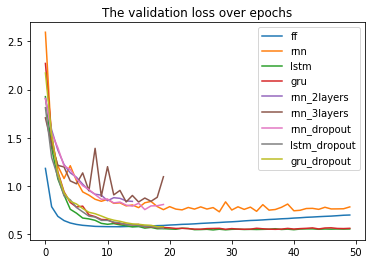

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_ff = result_ff.history['val_loss']
loss_rnn = result_rnn.history['val_loss']
loss_lstm = result_lstm.history['val_loss']
loss_gru = result_gru.history['val_loss']
loss_rnn2 = result_rnn2.history['val_loss']
loss_rnn3 = result_rnn3.history['val_loss']
loss_rnn_drop = result_rnn_drop.history['val_loss']
loss_lstm_drop = result_lstm_drop.history['val_loss']
loss_gru_drop = result_gru_drop.history['val_loss']
plt.plot(loss_ff)
plt.plot(loss_rnn)
plt.plot(loss_lstm)
plt.plot(loss_gru)
plt.plot(loss_rnn2)
plt.plot(loss_rnn3)
plt.plot(loss_rnn_drop)
plt.plot(loss_lstm_drop)
plt.plot(loss_gru_drop)
plt.legend(['ff', 'rnn', 'lstm', 'gru', 'rnn_2layers', 'rnn_3layers', 'rnn_dropout', 'lstm_dropout', 'gru_dropout'])
plt.title('The validation loss over epochs')
plt.show()

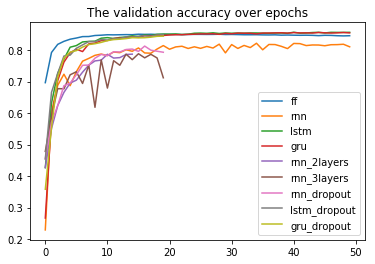

In [33]:
acc_ff = result_ff.history['val_acc']
acc_rnn = result_rnn.history['val_acc']
acc_lstm = result_lstm.history['val_acc']
acc_gru = result_gru.history['val_acc']
acc_rnn2 = result_rnn2.history['val_acc']
acc_rnn3 = result_rnn3.history['val_acc']
acc_rnn_drop = result_rnn_drop.history['val_acc']
acc_lstm_drop = result_lstm_drop.history['val_acc']
acc_gru_drop = result_gru_drop.history['val_acc']
plt.plot(acc_ff)
plt.plot(acc_rnn)
plt.plot(acc_lstm)
plt.plot(acc_gru)
plt.plot(acc_rnn2)
plt.plot(acc_rnn3)
plt.plot(acc_rnn_drop)
plt.plot(acc_lstm_drop)
plt.plot(acc_gru_drop)
plt.legend(['ff', 'rnn', 'lstm', 'gru', 'rnn_2layers', 'rnn_3layers', 'rnn_dropout', 'lstm_dropout', 'gru_dropout'])
plt.title('The validation accuracy over epochs')
plt.show()

The best performing model is LSTM. 

In [35]:
lstm.evaluate(test_x, test_y)

38693/38693 [==============================] - 66s 2ms/step


[0.5659581459745785, 0.8548057788245834]

The test accuracy rate is 85.5%. It performs worse than hand-coding.